In [2]:
# pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("train_data.csv")

In [5]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [8]:
df.shape

(318438, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [10]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [11]:
df = df.drop(['case_id'], axis = 1)
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


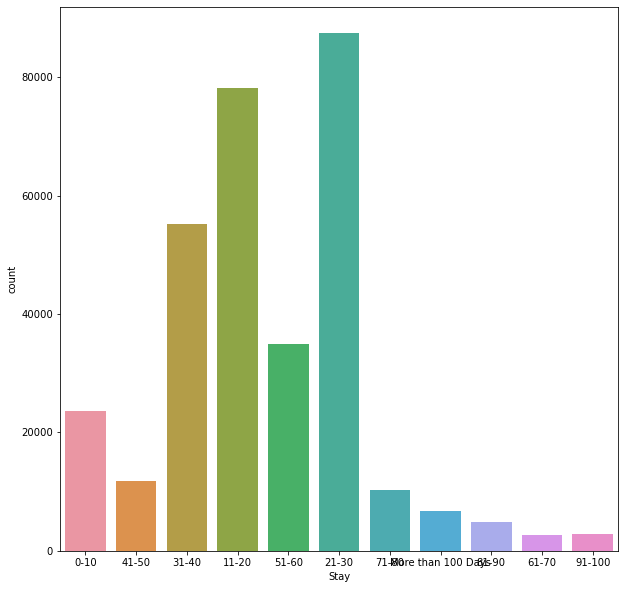

In [12]:
plt.figure(figsize = [10,10])
sns.countplot(df['Stay'],label="Count")       
data = df['Stay'].value_counts()
plt.show()

In [13]:
data.head()

21-30    87491
11-20    78139
31-40    55159
51-60    35018
0-10     23604
Name: Stay, dtype: int64

In [14]:
df.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [15]:
df.describe(include = 'object')

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [16]:
df['Bed Grade'].unique()

array([ 2.,  3.,  4.,  1., nan])

In [17]:
df['Bed Grade'] = df['Bed Grade'].astype('object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318325 non-null  object 
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [18]:
df['Bed Grade'].mode()

0    2.0
dtype: object

In [19]:
df['City_Code_Patient'] = df['City_Code_Patient'].fillna(df['City_Code_Patient'].median())
df['Bed Grade'] = df['Bed Grade'].fillna(df['Bed Grade'].mode()[0])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318438 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  318438 non-null  float64
 11  Type of Admission                  3184

In [21]:
df.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

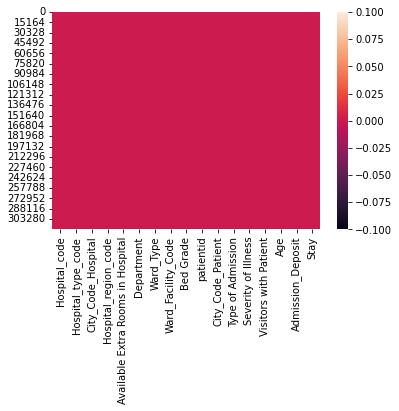

In [22]:
sns.heatmap(df.isnull())
plt.show()

In [23]:
#correlation
df.corr()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
Hospital_code,1.000000,0.128294,-0.059638,-0.013374,0.002291,-0.015477,-0.028500,0.045446
City_Code_Hospital,0.128294,1.000000,-0.045771,-0.049400,0.000750,-0.024161,0.018184,-0.034455
Available Extra Rooms in Hospital,-0.059638,-0.045771,1.000000,-0.115913,0.000921,-0.009462,0.096714,-0.143739
Bed Grade,-0.013374,-0.049400,-0.115913,1.000000,0.001656,-0.007439,0.088950,0.073889
patientid,0.002291,0.000750,0.000921,0.001656,1.000000,0.002009,0.006889,-0.000877
City_Code_Patient,-0.015477,-0.024161,-0.009462,-0.007439,0.002009,1.000000,-0.011677,0.025485
Visitors with Patient,-0.028500,0.018184,0.096714,0.088950,0.006889,-0.011677,1.000000,-0.150358
Admission_Deposit,0.045446,-0.034455,-0.143739,0.073889,-0.000877,0.025485,-0.150358,1.000000


C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

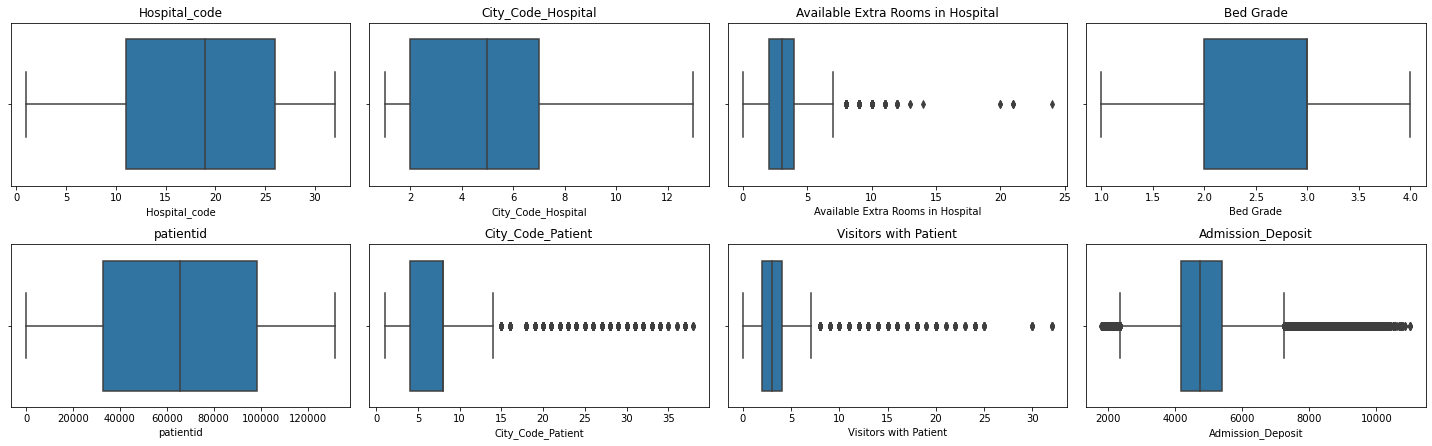

In [26]:
#treating outliers 
#plotting boxplot

object_ = df.select_dtypes(include=["object"]).columns

count = 1
plt.figure(figsize=(20,12))
for i in df.columns:
    if i not in object_:
        plt.subplot(4,4,count)
        sns.boxplot(df[i]),plt.title(str(i))
        count = count+1
plt.tight_layout()

In [27]:
object_

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')

In [28]:
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3-Q1

condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

C:\Users\DESARA~1\AppData\Local\Temp/ipykernel_4332/609155193.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

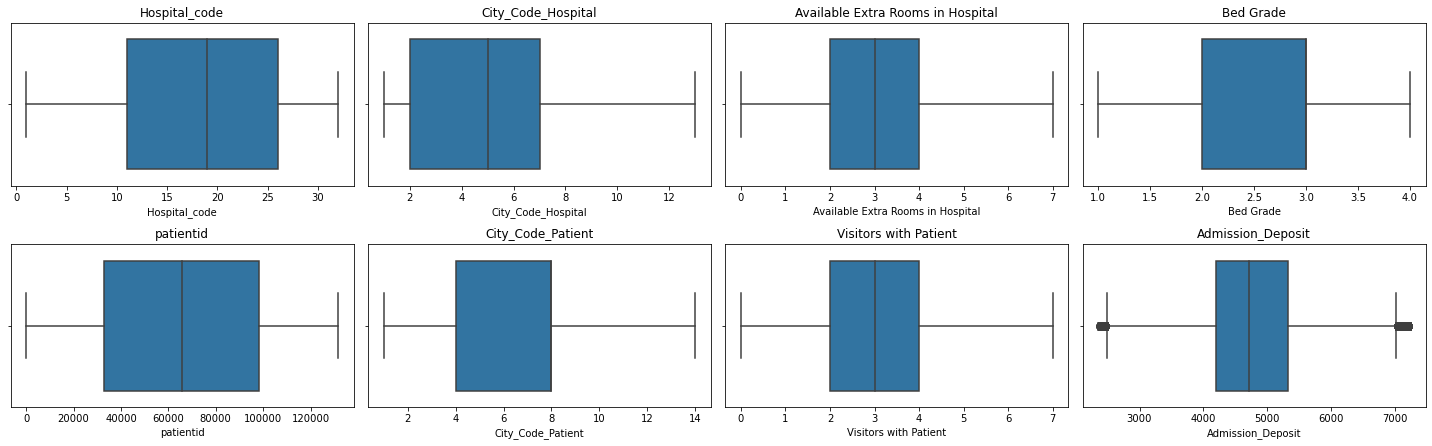

In [29]:
object_ = df.select_dtypes(include=["object"]).columns

count = 1
plt.figure(figsize=(20,12))
for i in df.columns:
    if i not in object_:
        plt.subplot(4,4,count)
        sns.boxplot(df[i]),plt.title(str(i))
        count = count+1
plt.tight_layout()

In [30]:
df.shape

(272804, 17)

C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


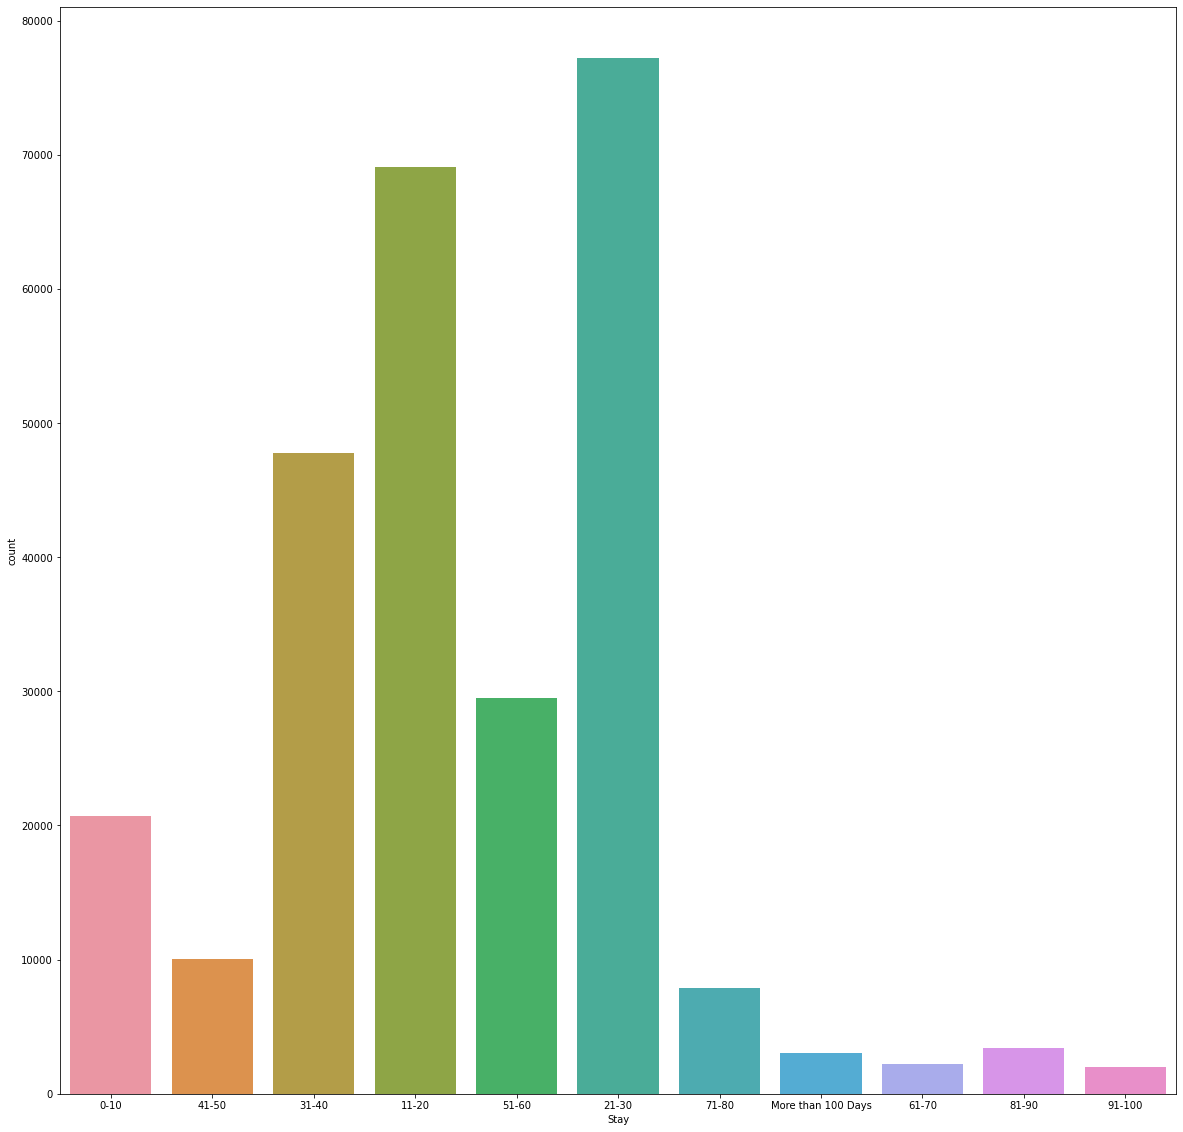

In [32]:
#Visualization
plt.figure(figsize = (20,20))
sns.countplot(df['Stay'])
plt.show()

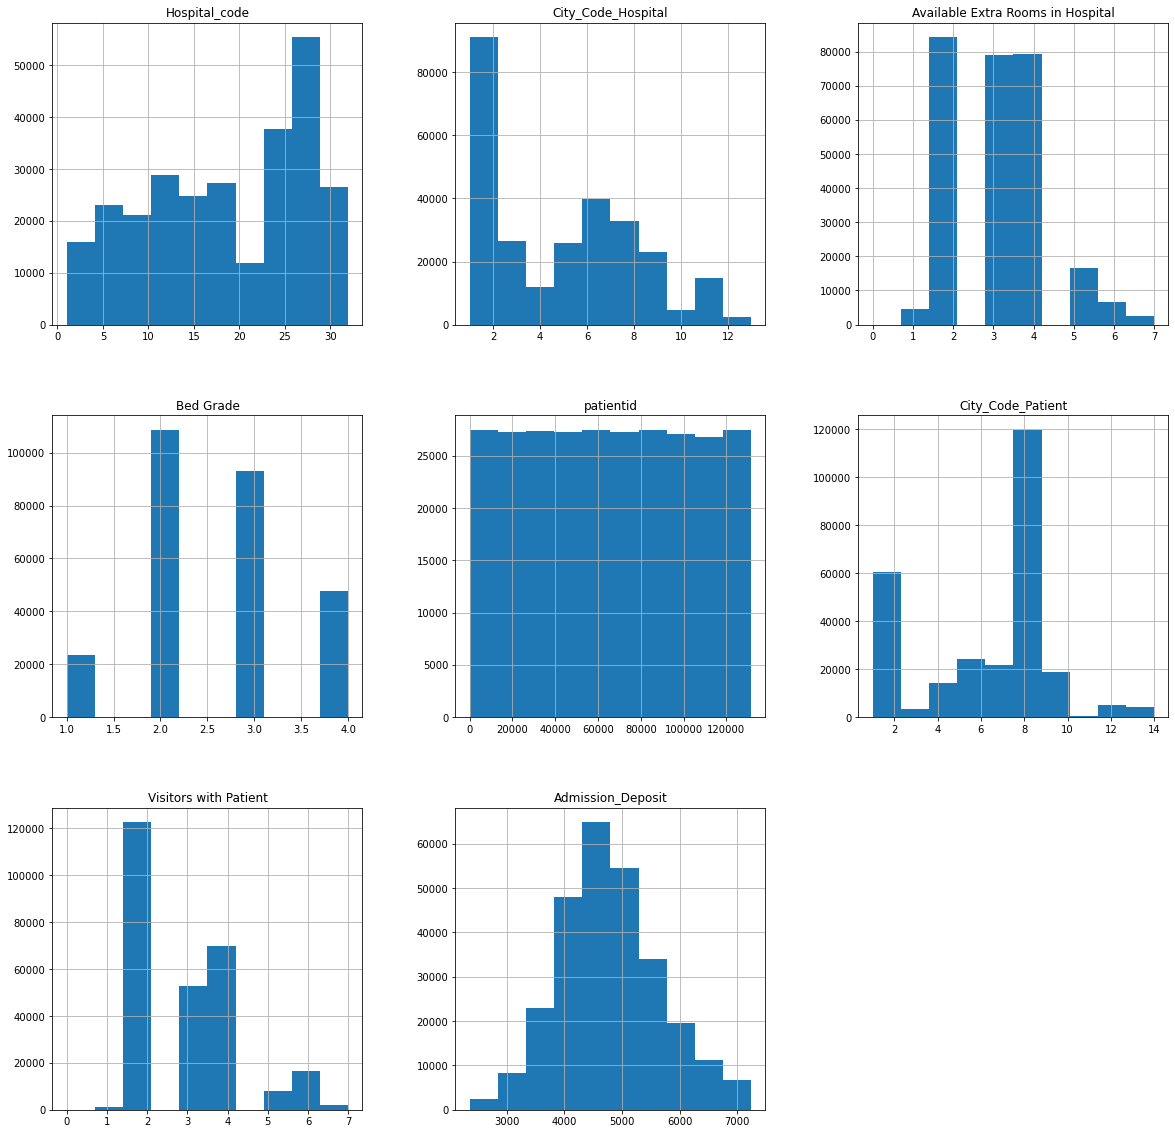

In [33]:
df.hist(figsize = (20,20))
plt.show()

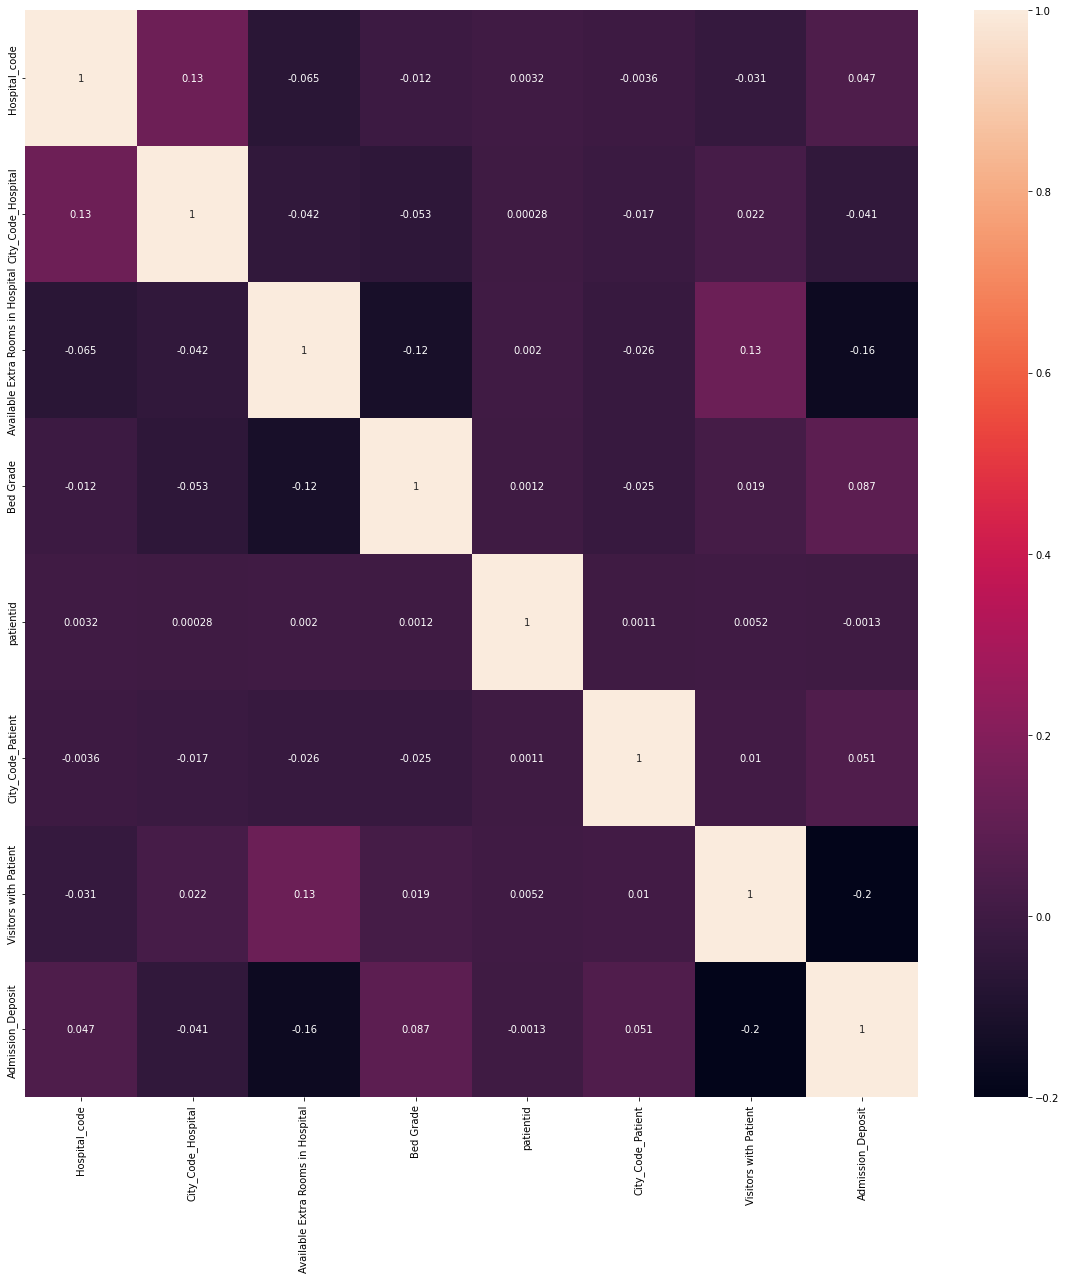

In [34]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [35]:
#check correlation
df_num = df.drop('Stay', axis = 1)
corr = df_num.corr()
corr

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
Hospital_code,1.000000,0.132616,-0.064959,-0.012175,0.003217,-0.003587,-0.030766,0.047402
City_Code_Hospital,0.132616,1.000000,-0.042483,-0.052712,0.000281,-0.017387,0.022246,-0.041366
Available Extra Rooms in Hospital,-0.064959,-0.042483,1.000000,-0.122562,0.001989,-0.025933,0.131380,-0.162206
Bed Grade,-0.012175,-0.052712,-0.122562,1.000000,0.001170,-0.025105,0.018610,0.087064
patientid,0.003217,0.000281,0.001989,0.001170,1.000000,0.001109,0.005159,-0.001340
City_Code_Patient,-0.003587,-0.017387,-0.025933,-0.025105,0.001109,1.000000,0.010290,0.050894
Visitors with Patient,-0.030766,0.022246,0.131380,0.018610,0.005159,0.010290,1.000000,-0.200369
Admission_Deposit,0.047402,-0.041366,-0.162206,0.087064,-0.001340,0.050894,-0.200369,1.000000


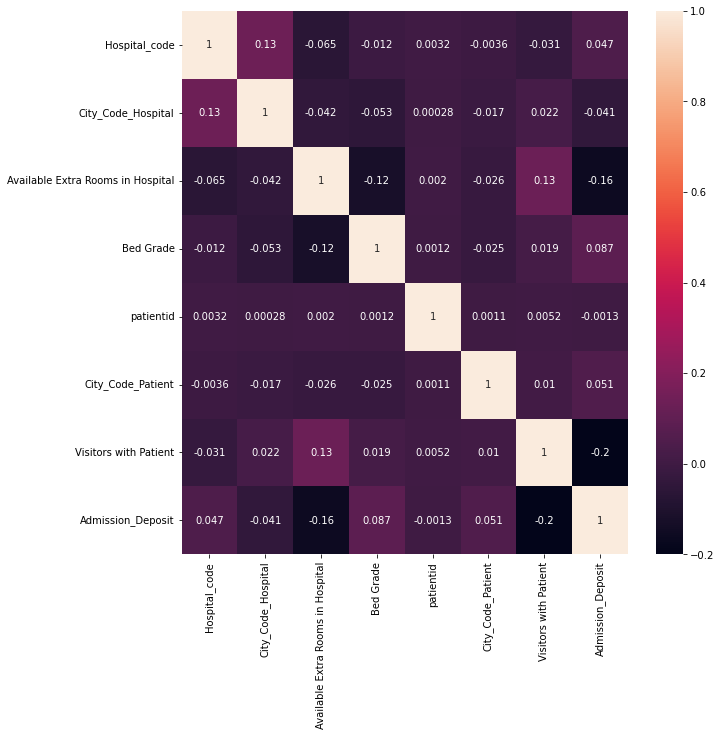

In [36]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)
plt.show()

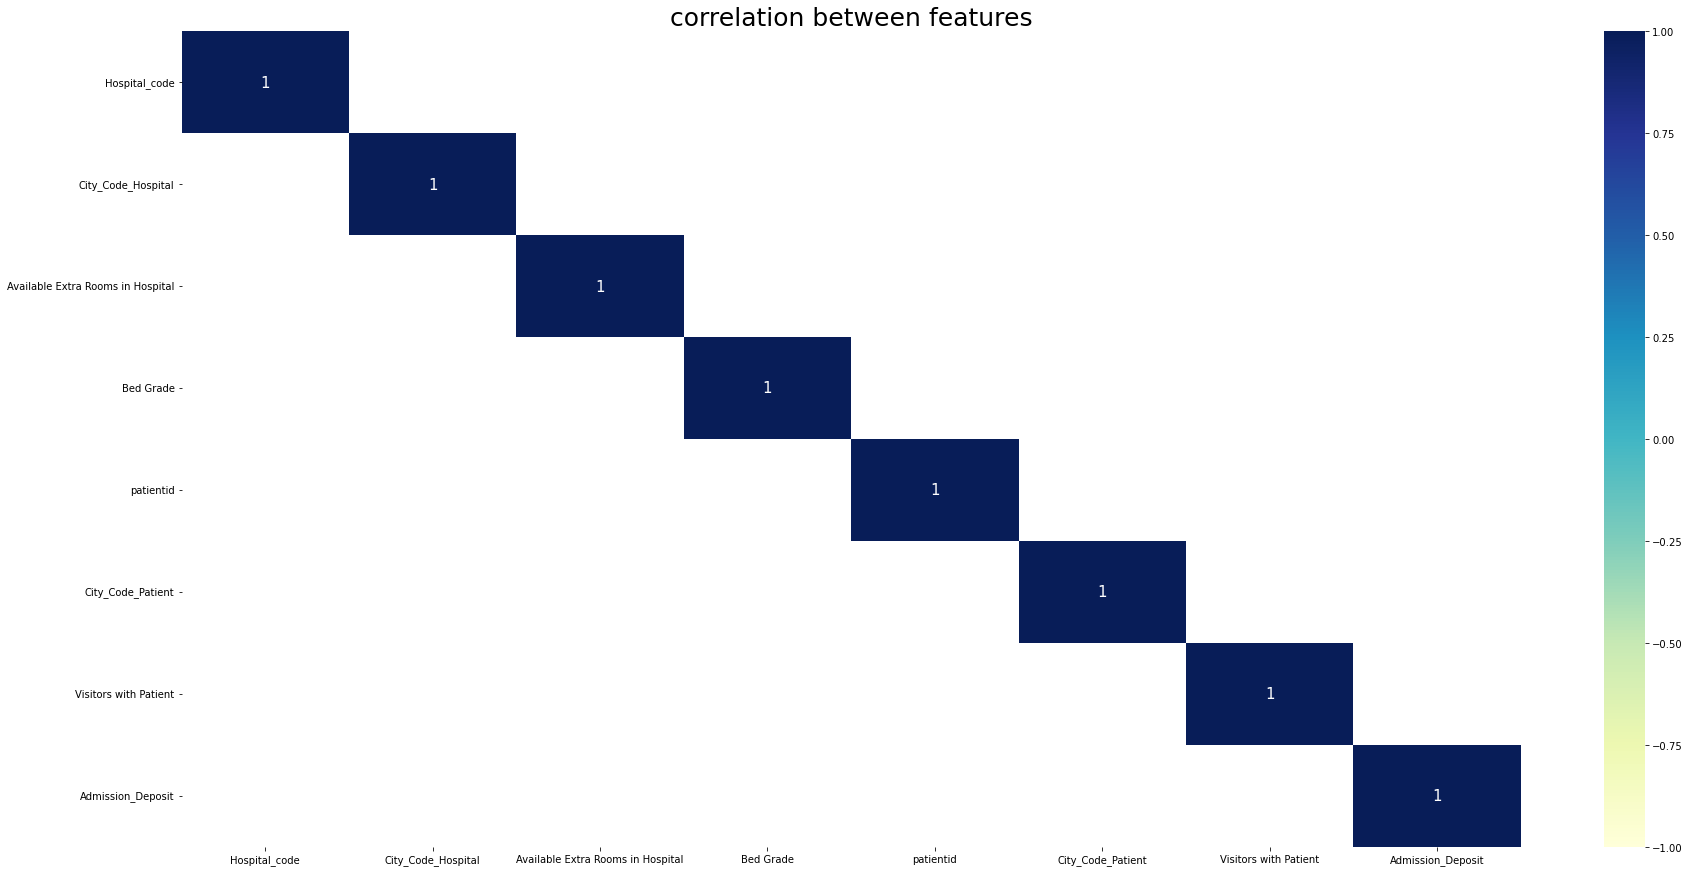

In [37]:
plt.figure(figsize = (30,15))
sns.heatmap(corr [(corr >= 0.9) | (corr <= -0.9)],
            cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0,
            annot = True, annot_kws = {'size': 15})
plt.title('correlation between features', fontsize =25)
plt.show()            

In [38]:
objlist = df.select_dtypes(include ='object').columns
print(objlist)

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')


In [39]:
for feature in df.columns: 
    if df[feature].dtype == object:
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))



feature: Hospital_type_code
['c', 'e', 'b', 'a', 'f', 'd', 'g']
Categories (7, object): ['a', 'b', 'c', 'd', 'e', 'f', 'g']


feature: Hospital_region_code
['Z', 'X', 'Y']
Categories (3, object): ['X', 'Y', 'Z']


feature: Department
['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease', 'surgery']
Categories (5, object): ['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy', 'surgery']


feature: Ward_Type
['R', 'S', 'Q', 'P', 'T', 'U']
Categories (6, object): ['P', 'Q', 'R', 'S', 'T', 'U']


feature: Ward_Facility_Code
['F', 'E', 'D', 'B', 'A', 'C']
Categories (6, object): ['A', 'B', 'C', 'D', 'E', 'F']


feature: Type of Admission
['Emergency', 'Trauma', 'Urgent']
Categories (3, object): ['Emergency', 'Trauma', 'Urgent']


feature: Severity of Illness
['Extreme', 'Moderate', 'Minor']
Categories (3, object): ['Extreme', 'Minor', 'Moderate']


feature: Age
['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30', '11-20', '0-10', '91-100']
Categories (1

In [69]:
df1 = df.copy(deep=True)

In [71]:
df1.sample(5)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
181952,29,a,4,X,3,gynecology,S,F,1.0,5119,2.0,Emergency,Minor,2,21-30,5015.0,21-30
223550,11,b,2,Y,4,gynecology,Q,D,3.0,6483,8.0,Trauma,Moderate,4,71-80,4810.0,21-30
108370,11,b,2,Y,4,gynecology,Q,D,3.0,31024,2.0,Emergency,Extreme,2,31-40,4397.0,11-20
185367,26,b,2,Y,2,gynecology,S,D,3.0,25931,8.0,Urgent,Moderate,2,31-40,4807.0,21-30
38582,12,a,9,Y,4,gynecology,S,B,1.0,10248,7.0,Trauma,Moderate,2,21-30,6950.0,11-20


In [72]:
from sklearn.preprocessing import LabelEncoder

fcateg = ['Stay','Severity of Illness','Age']

le = LabelEncoder()
df1[fcateg] = df1[fcateg].apply(le.fit_transform)

In [80]:
df1['Severity of Illness'][223550]

2

In [53]:
cat_one_hot = ['Hospital_region_code','Hospital_type_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission']
df1 = pd.get_dummies(df1, columns=cat_one_hot, drop_first=True)
df1.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,...,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Trauma,Type of Admission_Urgent
0,8,3,3,2.0,31397,7.0,0,2,5,4911.0,...,0,0,0,0,0,0,0,1,0,0
1,2,5,2,2.0,31397,7.0,0,2,5,5954.0,...,1,0,0,0,0,0,0,1,1,0
2,10,1,2,2.0,31397,7.0,0,2,5,4745.0,...,1,0,0,0,0,0,1,0,1,0
4,26,2,2,2.0,31397,7.0,0,2,5,5558.0,...,1,0,0,0,0,1,0,0,1,0
5,23,6,2,2.0,31397,7.0,0,2,5,4449.0,...,1,0,0,0,0,0,0,1,1,0


In [54]:
df1.shape

(272804, 35)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272804 entries, 0 to 318437
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      272804 non-null  int64  
 1   City_Code_Hospital                 272804 non-null  int64  
 2   Available Extra Rooms in Hospital  272804 non-null  int64  
 3   Bed Grade                          272804 non-null  float64
 4   patientid                          272804 non-null  int64  
 5   City_Code_Patient                  272804 non-null  float64
 6   Severity of Illness                272804 non-null  int32  
 7   Visitors with Patient              272804 non-null  int64  
 8   Age                                272804 non-null  int32  
 9   Admission_Deposit                  272804 non-null  float64
 10  Stay                               272804 non-null  int32  
 11  Hospital_region_code_Y             2728

In [56]:
df1.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,...,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Trauma,Type of Admission_Urgent
0,8,3,3,2.0,31397,7.0,0,2,5,4911.0,...,0,0,0,0,0,0,0,1,0,0
1,2,5,2,2.0,31397,7.0,0,2,5,5954.0,...,1,0,0,0,0,0,0,1,1,0
2,10,1,2,2.0,31397,7.0,0,2,5,4745.0,...,1,0,0,0,0,0,1,0,1,0
4,26,2,2,2.0,31397,7.0,0,2,5,5558.0,...,1,0,0,0,0,1,0,0,1,0
5,23,6,2,2.0,31397,7.0,0,2,5,4449.0,...,1,0,0,0,0,0,0,1,1,0


In [57]:
#standard scaling
from sklearn.preprocessing import StandardScaler
x = df1.drop(['Stay'], axis = 1)
y = df1['Stay']
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-1.19999571, -0.57936509, -0.15955369, ...,  1.36415916,
        -0.95582157, -0.424245  ],
       [-1.89531674,  0.0676511 , -1.05658981, ...,  1.36415916,
         1.04622037, -0.424245  ],
       [-0.96822203, -1.22638127, -1.05658981, ..., -0.73305229,
         1.04622037, -0.424245  ],
       ...,
       [-1.31588255, -0.255857  , -0.15955369, ...,  1.36415916,
        -0.95582157, -0.424245  ],
       [-0.85233519, -0.90287318, -0.15955369, ..., -0.73305229,
         1.04622037, -0.424245  ],
       [ 0.07475951,  0.71466728,  1.63451857, ..., -0.73305229,
        -0.95582157, -0.424245  ]])

# Bagging meta-estimator

In [58]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state= 10)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (218243, 34)
x_test (54561, 34)
y_train (218243,)
y_test (54561,)


In [59]:
#build the model
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state= 10))
meta_estimator.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10))

In [60]:
#predict the values
y_pred = meta_estimator.predict(x_test)
print(y_pred)

[1 2 2 ... 2 2 3]


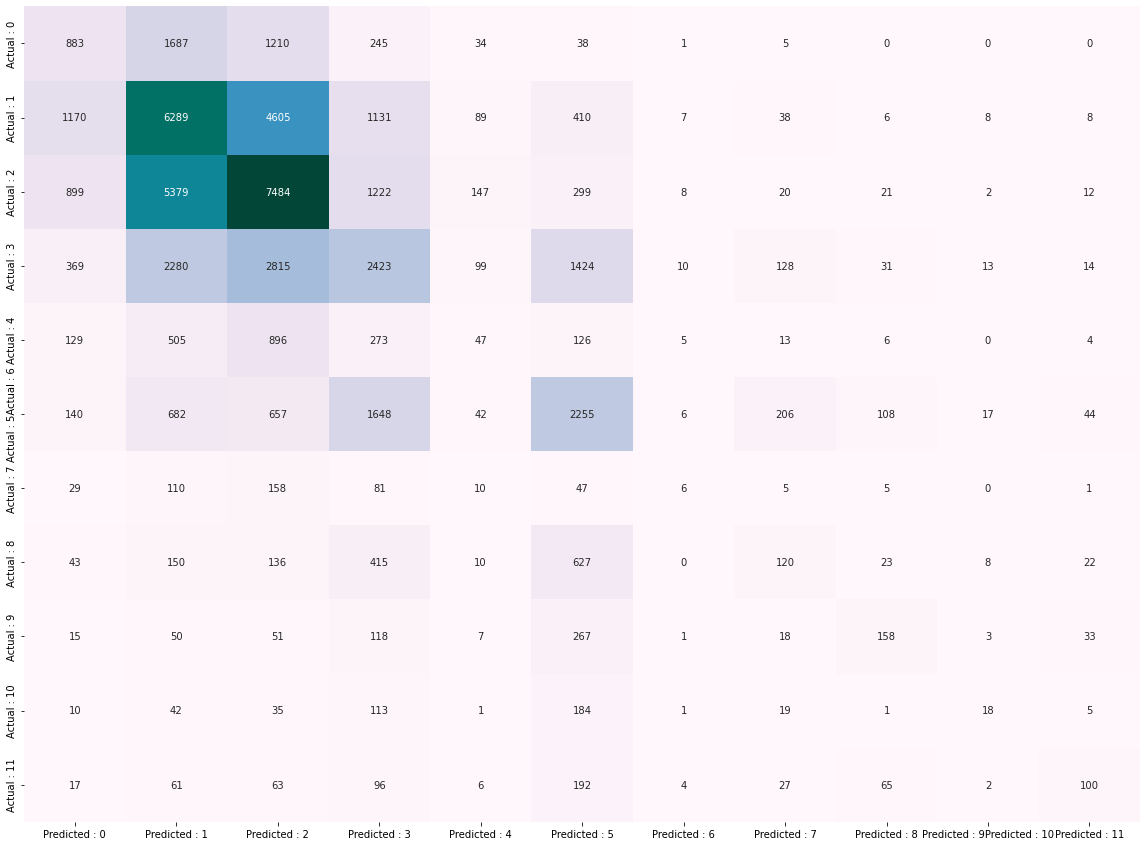

In [61]:
#compute accuracy measures
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted : 0', 'Predicted : 1','Predicted : 2','Predicted : 3','Predicted : 4',
                                                 'Predicted : 5','Predicted : 6','Predicted : 7','Predicted : 8','Predicted : 9'
                                                'Predicted : 10','Predicted : 11'],
                           index = ['Actual : 0', 'Actual : 1','Actual : 2','Actual : 3','Actual : 4','Actual : 5''Actual : 6',
                                   'Actual : 7','Actual : 8','Actual : 9','Actual : 10','Actual : 11'])
plt.figure(figsize = (20,15))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'PuBuGn', cbar = False)
plt.show()

In [62]:
TN = cm[0,0]
FN = cm[1,1]
TP = cm[1,0]
FP = cm[0,1]

In [63]:
from sklearn.metrics import classification_report
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.24      0.22      0.23      4103
           1       0.36      0.46      0.41     13761
           2       0.41      0.48      0.45     15493
           3       0.31      0.25      0.28      9606
           4       0.10      0.02      0.04      2004
           5       0.38      0.39      0.39      5805
           6       0.12      0.01      0.02       452
           7       0.20      0.08      0.11      1554
           8       0.37      0.22      0.28       721
           9       0.25      0.04      0.07       429
          10       0.41      0.16      0.23       633

    accuracy                           0.36     54561
   macro avg       0.29      0.21      0.23     54561
weighted avg       0.35      0.36      0.35     54561



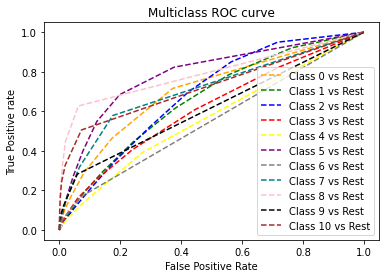

In [64]:
#plotting roc_curve
from sklearn.metrics import roc_curve
pred = meta_estimator.predict(x_test)
pred_prob = meta_estimator.predict_proba(x_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 11

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='gray', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='teal', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='pink', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='brown', label='Class 10 vs Rest')



plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


In [65]:
#finding area under roc 
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, meta_estimator.predict_proba(x_test), multi_class='ovr',average="weighted")

0.6745352085688879

In [66]:
pred_prob

array([[0.1, 0.6, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0.3, 0.4, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0.3, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0.2, 0.1, 0.3, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [67]:
#finding F1 Score
from sklearn import metrics
metrics.f1_score(y_test, y_pred,average="weighted")

0.3476798009799956

In [68]:

cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'F1 Score']
result_tabulation = pd.DataFrame(columns = cols)
Bagging_meta_estimator = pd.Series({'Model' : 'Bagging_meta_estimator', 
                                    'AUC Score' : metrics.roc_auc_score(y_test, pred_prob,multi_class='ovr',average="weighted"), 
                                    'Precision Score' : metrics.precision_score(y_test, y_pred,average="weighted"), 
                                    'Recall Score': metrics.recall_score(y_test, y_pred,average="weighted"), 
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred), 
                                    'F1 Score':metrics.f1_score(y_test, y_pred,average="weighted")})
result_tabulation = result_tabulation.append(Bagging_meta_estimator, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1 Score
0,Bagging_meta_estimator,0.674535,0.345043,0.362585,0.362585,0.34768


In [46]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(x_train, y_train)

AdaBoostClassifier(random_state=10)

In [47]:
y_pred_adaboost = adaboost.predict(x_test)
print(y_pred_adaboost)

[2 2 2 ... 2 1 1]


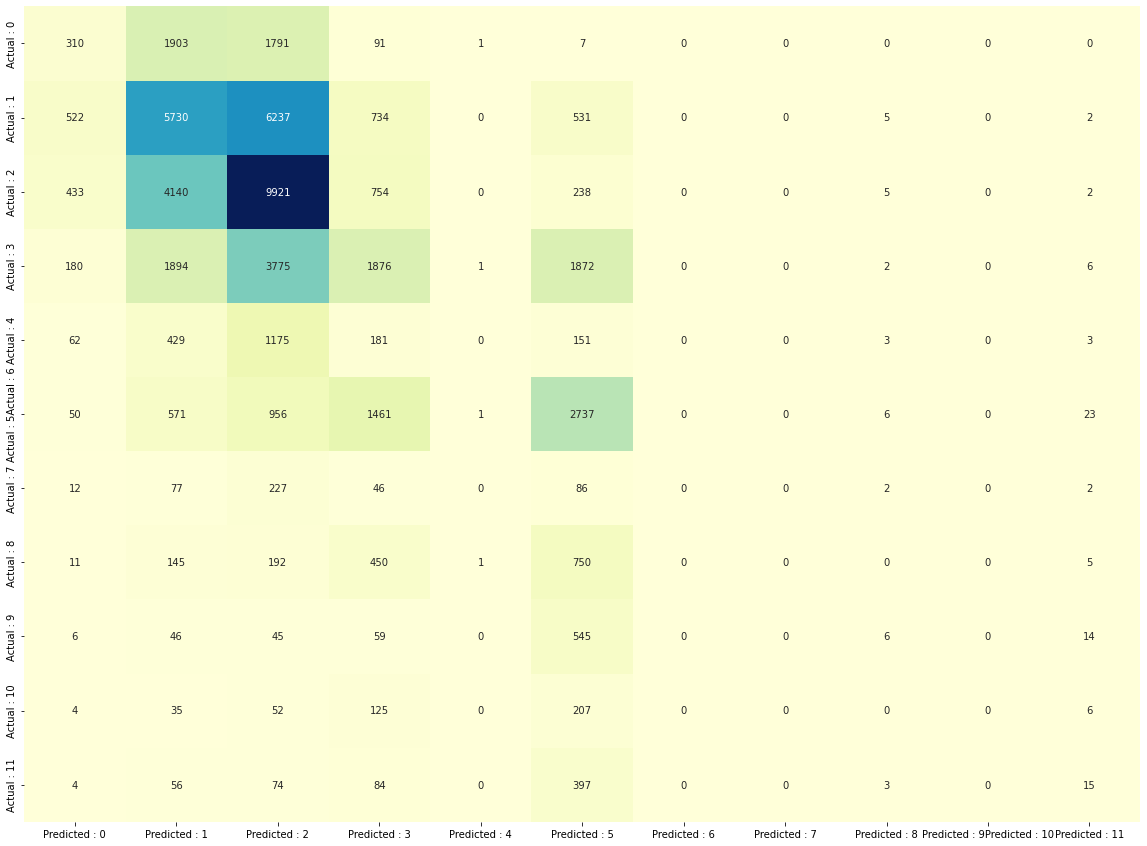

In [48]:
#compute accuracy measures
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_adaboost)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted : 0', 'Predicted : 1','Predicted : 2','Predicted : 3','Predicted : 4',
                                                 'Predicted : 5','Predicted : 6','Predicted : 7','Predicted : 8','Predicted : 9'
                                                'Predicted : 10','Predicted : 11'],
                           index = ['Actual : 0', 'Actual : 1','Actual : 2','Actual : 3','Actual : 4','Actual : 5''Actual : 6',
                                   'Actual : 7','Actual : 8','Actual : 9','Actual : 10','Actual : 11'])
plt.figure(figsize = (20,15))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu', cbar = False)
plt.show()

In [49]:
result = classification_report(y_test, y_pred_adaboost)
print(result)

              precision    recall  f1-score   support

           0       0.19      0.08      0.11      4103
           1       0.38      0.42      0.40     13761
           2       0.41      0.64      0.50     15493
           3       0.32      0.20      0.24      9606
           4       0.00      0.00      0.00      2004
           5       0.36      0.47      0.41      5805
           6       0.00      0.00      0.00       452
           7       0.00      0.00      0.00      1554
           8       0.19      0.01      0.02       721
           9       0.00      0.00      0.00       429
          10       0.19      0.02      0.04       633

    accuracy                           0.38     54561
   macro avg       0.19      0.17      0.16     54561
weighted avg       0.33      0.38      0.34     54561



C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


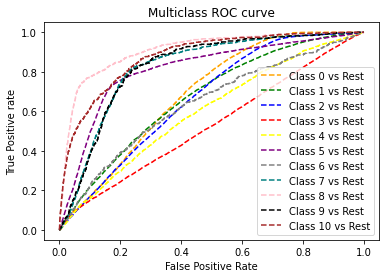

In [50]:
#plotting roc_curve
from sklearn.metrics import roc_curve
pred = adaboost.predict(x_test)
pred_prob = adaboost.predict_proba(x_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 11

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='gray', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='teal', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='pink', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='brown', label='Class 10 vs Rest')



plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [51]:
#finding area under roc 
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, adaboost.predict_proba(x_test), multi_class='ovr',average="weighted")

0.6691732104164065

In [52]:
adaboost = pd.Series({'Model' : 'adaboost', 
                                    'AUC Score' : metrics.roc_auc_score(y_test, pred_prob,multi_class='ovr',average="weighted"), 
                                    'Precision Score' : metrics.precision_score(y_test, y_pred_adaboost,average="weighted"), 
                                    'Recall Score': metrics.recall_score(y_test, y_pred_adaboost,average="weighted"), 
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_adaboost), 
                                    'F1 Score':metrics.f1_score(y_test, y_pred_adaboost,average="weighted")})
result_tabulation = result_tabulation.append(adaboost, ignore_index = True)
result_tabulation

C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1 Score
0,Bagging_meta_estimator,0.676542,0.346695,0.365426,0.365426,0.349938
1,adaboost,0.669173,0.325829,0.377467,0.377467,0.336778


In [53]:
from xgboost.sklearn import XGBClassifier
xgbm = XGBClassifier(random_state = 1, learning_rate = 0.01)
xgbm.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

In [54]:
y_pred_xgbm = xgbm.predict(x_test)
print(y_pred_xgbm)

[2 2 2 ... 2 2 3]


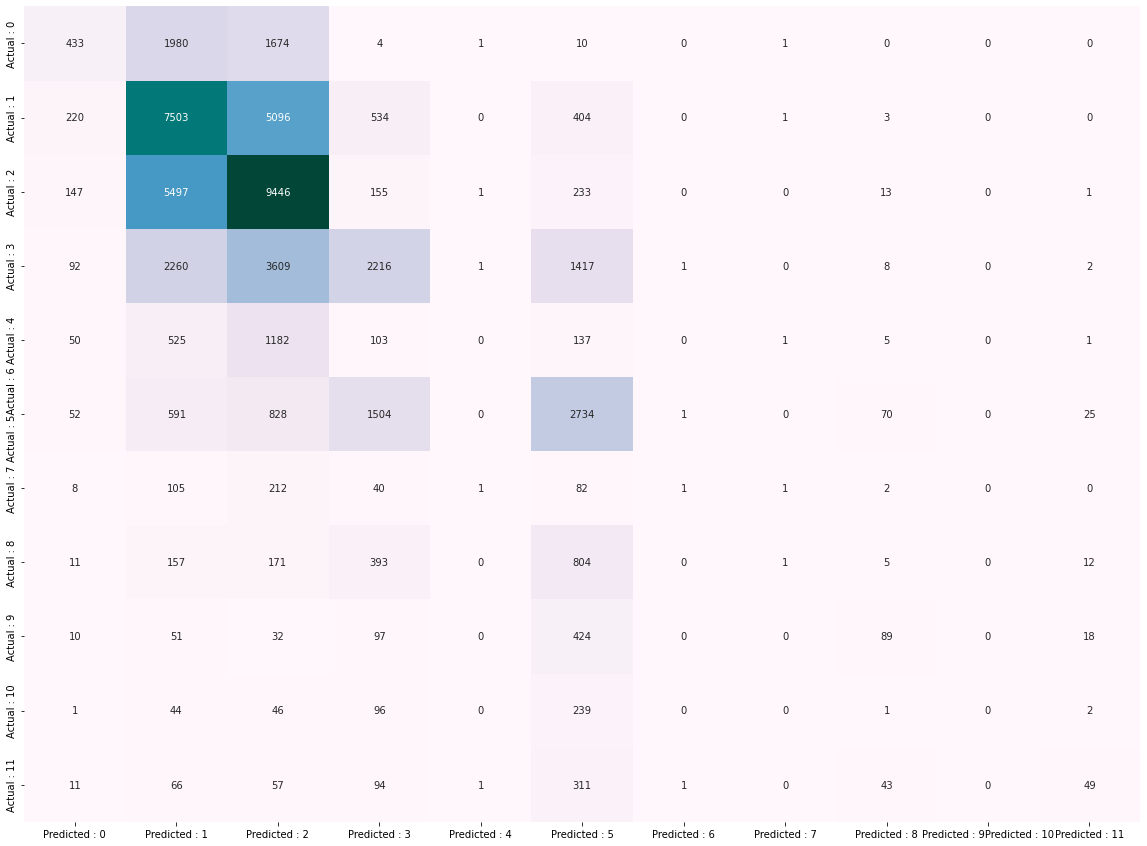

In [55]:
#compute accuracy measures
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgbm)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted : 0', 'Predicted : 1','Predicted : 2','Predicted : 3','Predicted : 4',
                                                 'Predicted : 5','Predicted : 6','Predicted : 7','Predicted : 8','Predicted : 9'
                                                'Predicted : 10','Predicted : 11'],
                           index = ['Actual : 0', 'Actual : 1','Actual : 2','Actual : 3','Actual : 4','Actual : 5''Actual : 6',
                                   'Actual : 7','Actual : 8','Actual : 9','Actual : 10','Actual : 11'])
plt.figure(figsize = (20,15))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'PuBuGn', cbar = False)
plt.show()

In [56]:
result = classification_report(y_test, y_pred_xgbm)
print(result)

              precision    recall  f1-score   support

           0       0.42      0.11      0.17      4103
           1       0.40      0.55      0.46     13761
           2       0.42      0.61      0.50     15493
           3       0.42      0.23      0.30      9606
           4       0.00      0.00      0.00      2004
           5       0.40      0.47      0.43      5805
           6       0.25      0.00      0.00       452
           7       0.20      0.00      0.00      1554
           8       0.37      0.12      0.19       721
           9       0.00      0.00      0.00       429
          10       0.45      0.08      0.13       633

    accuracy                           0.41     54561
   macro avg       0.30      0.20      0.20     54561
weighted avg       0.39      0.41      0.37     54561



C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


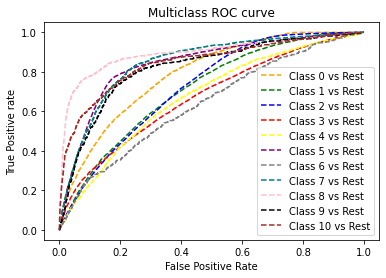

In [57]:
#plotting roc_curve
from sklearn.metrics import roc_curve
pred = xgbm.predict(x_test)
pred_prob = xgbm.predict_proba(x_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 11

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='gray', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='teal', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='pink', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='brown', label='Class 10 vs Rest')



plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [58]:
#finding area under roc 
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, xgbm.predict_proba(x_test), multi_class='ovr',average="weighted")

0.7343002921617217

In [59]:
from sklearn import metrics
xgbm = pd.Series({'Model' : 'XGBM', 
                                    'AUC Score' : metrics.roc_auc_score(y_test, pred_prob,multi_class='ovr',average="weighted"), 
                                    'Precision Score' : metrics.precision_score(y_test, y_pred_xgbm,average="weighted"), 
                                    'Recall Score': metrics.recall_score(y_test, y_pred_xgbm,average="weighted"), 
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_xgbm), 
                                    'F1 Score':metrics.f1_score(y_test, y_pred_xgbm,average="weighted")})
result_tabulation = result_tabulation.append(xgbm, ignore_index = True)
result_tabulation

C:\Users\Desaraju_Bhaskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1 Score
0,Bagging_meta_estimator,0.676542,0.346695,0.365426,0.365426,0.349938
1,adaboost,0.669173,0.325829,0.377467,0.377467,0.336778
2,XGBM,0.734300,0.387403,0.411869,0.411869,0.373529
